In [20]:
from fintech_analysis import Reader
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
r = Reader()
r.set_dir('dataset/newfactor')
x_train, y_train = r.read(input_cols=range(2,15),
                         output_cols=[1]
                         )
x_train = x_train.reshape(-1, x_train.shape[1], 1)
print(x_train.shape)
print(y_train.shape)


(20475, 13, 1)
(20475, 1)


In [21]:
from fintech_analysis.models import FeatureExtractModel
model = FeatureExtractModel(batch_input_shape=(None, x_train.shape[1], 1), 
                        class_num=y_train.shape[1])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 13, 1)             0         
_________________________________________________________________
locally_connected1d_2 (Local (None, 13, 1)             26        
_________________________________________________________________
flatten_2 (Flatten)          (None, 13)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                140       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 10)                0         
__________

/home/yao/fintech_tutorial/fintech_analysis/models/models.py:45: UserWarning: Update your `LocallyConnected1D` call to the Keras 2 API: `LocallyConnected1D(1, activity_regularizer=<keras.reg..., activation="linear", kernel_size=1)`
  activity_regularizer=regularizers.l2(0.01))(inputs)


In [22]:
import keras
from keras.callbacks import EarlyStopping


model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adadelta(), metrics=['mse'])
model.fit(x_train, y_train,
             batch_size=128,
             epochs=1000,
             shuffle=True,
             verbose=1,
             validation_split=0.3,
             callbacks=[EarlyStopping(patience=3)]
            )

Train on 14332 samples, validate on 6143 samples
Epoch 1/1000
14332/14332 [==============================] - 0s - loss: 48910.1667 - mean_squared_error: 124.6281 - val_loss: 64429.2758 - val_mean_squared_error: 116.1556
Epoch 2/1000
14332/14332 [==============================] - 0s - loss: 46769.7092 - mean_squared_error: 103.1995 - val_loss: 62785.9275 - val_mean_squared_error: 104.1736
Epoch 3/1000
14332/14332 [==============================] - 0s - loss: 44747.7480 - mean_squared_error: 85.8920 - val_loss: 59819.0122 - val_mean_squared_error: 91.4156
Epoch 4/1000
14332/14332 [==============================] - 0s - loss: 43376.4495 - mean_squared_error: 78.8148 - val_loss: 58487.2561 - val_mean_squared_error: 85.9031
Epoch 5/1000
14332/14332 [==============================] - 0s - loss: 42030.0168 - mean_squared_error: 75.0421 - val_loss: 56493.3158 - val_mean_squared_error: 81.4705
Epoch 6/1000
14332/14332 [==============================] - 0s - loss: 40947.2707 - mean_squared_error

14332/14332 [==============================] - 0s - loss: 7271.6796 - mean_squared_error: 52.2058 - val_loss: 9613.7874 - val_mean_squared_error: 59.9260
Epoch 49/1000
14332/14332 [==============================] - 0s - loss: 6750.7558 - mean_squared_error: 51.9787 - val_loss: 8903.3304 - val_mean_squared_error: 59.7077
Epoch 50/1000
14332/14332 [==============================] - 0s - loss: 6193.5175 - mean_squared_error: 51.7264 - val_loss: 8045.8901 - val_mean_squared_error: 59.4056
Epoch 51/1000
14332/14332 [==============================] - 0s - loss: 5764.0367 - mean_squared_error: 51.5005 - val_loss: 7676.5375 - val_mean_squared_error: 59.1643
Epoch 52/1000
14332/14332 [==============================] - 0s - loss: 5484.4987 - mean_squared_error: 51.2294 - val_loss: 7222.9686 - val_mean_squared_error: 58.9104
Epoch 53/1000
14332/14332 [==============================] - 0s - loss: 5148.2173 - mean_squared_error: 51.0817 - val_loss: 6667.8874 - val_mean_squared_error: 58.7149
Epoch 

14332/14332 [==============================] - 0s - loss: 48.5384 - mean_squared_error: 47.2699 - val_loss: 56.1362 - val_mean_squared_error: 54.8359
Epoch 98/1000
14332/14332 [==============================] - 0s - loss: 48.4303 - mean_squared_error: 47.1587 - val_loss: 55.9731 - val_mean_squared_error: 54.7043
Epoch 99/1000
14332/14332 [==============================] - 0s - loss: 48.3298 - mean_squared_error: 47.0638 - val_loss: 55.8629 - val_mean_squared_error: 54.5980
Epoch 100/1000
14332/14332 [==============================] - 0s - loss: 48.2450 - mean_squared_error: 46.9841 - val_loss: 55.8121 - val_mean_squared_error: 54.5675
Epoch 101/1000
14332/14332 [==============================] - 0s - loss: 48.1544 - mean_squared_error: 46.8915 - val_loss: 55.8057 - val_mean_squared_error: 54.5629
Epoch 102/1000
14332/14332 [==============================] - 0s - loss: 48.1080 - mean_squared_error: 46.8721 - val_loss: 55.6677 - val_mean_squared_error: 54.4390
Epoch 103/1000
14332/14332 

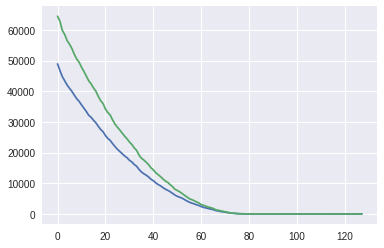

In [23]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

locally_connected1d_2


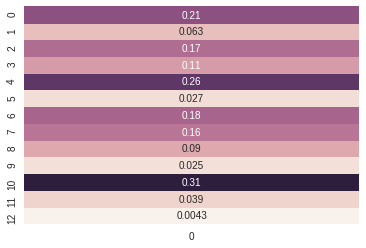

[[ 0.80817  ]
 [ 0.12863  ]
 [ 2.4682   ]
 [-2.7097   ]
 [ 3.3893   ]
 [ 0.57     ]
 [ 3.4      ]
 [-0.5      ]
 [-0.2      ]
 [-0.01     ]
 [ 0.041473 ]
 [-0.0097516]
 [ 4.608    ]]
[-3.8488]
[ 1.54452753]


In [25]:
num = 508
layer_index = 1
print(model.layers[layer_index].name)
result = model.get_layer_output([x_train[num:num+1]], layer_index)[0]

sns.heatmap(np.abs(result[0]), annot=True, cbar=False)
plt.show()

result = model.predict([x_train[num:num+1]])[0]

print(x_train[num])
print(y_train[num])
print(result)
